**Module 5: Introduction to
Convolutional NN - Assignment**

**Problem Statement:**
The task at hand involves classifying images of cats and dogs using a
Convolutional Neural Network (CNN). We have a dataset containing images of
cats and dogs and the objective is to train a CNN model to accurately predict the
class of each image.

**Data Preparation**

In [11]:
import zipfile
import os

zip_path = '/content/Cats_Dogs.zip'
extract_folder = '/content/dataset'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)

print("✅ Dataset extracted to", extract_folder)

✅ Dataset extracted to /content/dataset


In [16]:
import os

base_dir = '/content/dataset'
print(os.listdir(base_dir))

['cats', 'dogs', 'Cats_Dogs']


In [17]:
base_dir = '/content/dataset'
cats_dir = os.path.join(base_dir, 'cats')
dogs_dir = os.path.join(base_dir, 'dogs')

os.makedirs(cats_dir, exist_ok=True)
os.makedirs(dogs_dir, exist_ok=True)

for filename in os.listdir(base_dir):
    if filename.endswith('.jpg'):
        if 'cat' in filename.lower():
            shutil.move(os.path.join(base_dir, filename), cats_dir)
        elif 'dog' in filename.lower():
            shutil.move(os.path.join(base_dir, filename), dogs_dir)

In [18]:
base_dir = '/content/dataset/Cats_Dogs'

print("Contents of Cats_Dogs folder:")
print(os.listdir(base_dir))

Contents of Cats_Dogs folder:
['cats', 'dogs']


In [19]:
base_dir = '/content/dataset/Cats_Dogs'

for category in ['cats', 'dogs']:
    category_path = os.path.join(base_dir, category)
    num_files = len([f for f in os.listdir(category_path) if f.endswith('.jpg')])
    print(f"Number of images in '{category}': {num_files}")

Number of images in 'cats': 1000
Number of images in 'dogs': 1000


**Data Augmentation And Preprocessing**

In [21]:
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

**Organizing the Dataset into Structured Directory Format And Splitting the Dataset Into Training and Testing Sets.**

In [22]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

dataset_dir = '/content/dataset/Cats_Dogs'

train_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='training',
    shuffle=True
)

validation_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

Found 1600 images belonging to 2 classes.
Found 400 images belonging to 2 classes.


**Model Building**

In [23]:
import tensorflow as tf
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Flatten(),

    layers.Dense(512, activation='relu'),

    layers.Dense(1, activation='sigmoid')
])

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 15, 15, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     3,211,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,453,121 (13.17 MB)

 Trainable params: 3,453,121 (13.17 MB)

 Non-trainable params: 0 (0.00 B)

**Compiling The Model**

In [24]:
model.compile(
    loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
    metrics=['accuracy']
)

**Training The Model**

In [25]:
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=validation_generator
)


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 21s 322ms/step - accuracy: 0.4694 - loss: 0.6952 - val_accuracy: 0.5000 - val_loss: 0.6929
Epoch 2/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 14s 281ms/step - accuracy: 0.4954 - loss: 0.6940 - val_accuracy: 0.5000 - val_loss: 0.6924
Epoch 3/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 14s 283ms/step - accuracy: 0.5055 - loss: 0.6922 - val_accuracy: 0.5125 - val_loss: 0.6921
Epoch 4/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 14s 277ms/step - accuracy: 0.5185 - loss: 0.6911 - val_accuracy: 0.5275 - val_loss: 0.6919
Epoch 5/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 17s 336ms/step - accuracy: 0.5588 - loss: 0.6911 - val_accuracy: 0.5125 - val_loss: 0.6921
Epoch 6/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 14s 280ms/step - accuracy: 0.5471 - loss: 0.6902 - val_accuracy: 0.5750 - val_loss: 0.6900
Epoch 7/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 14s 280ms/step - accuracy: 0.5595 - loss: 0.6901 - val_accuracy: 0.5650 - val_loss: 0.6882
Epoch 8/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 14s 280ms/step - accuracy: 0.5418 - loss: 0.6879 - val_accu

**Evaluating The Model Performance**

In [26]:
val_loss, val_acc = model.evaluate(validation_generator)
print(f"Validation Loss: {val_loss:.4f}")
print(f"Validation Accuracy: {val_acc:.4f}")

13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 198ms/step - accuracy: 0.5395 - loss: 0.6825
Validation Loss: 0.6807
Validation Accuracy: 0.5600


**Making Prediction On Testing Dataset**

In [27]:
predictions = model.predict(validation_generator, steps=validation_generator.samples // validation_generator.batch_size + 1)
predicted_classes = (predictions > 0.5).astype(int).reshape(-1)
true_classes = validation_generator.classes

from sklearn.metrics import accuracy_score
print("Test Accuracy:", accuracy_score(true_classes, predicted_classes))


13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 210ms/step
Test Accuracy: 0.4975


**Prediction**

Implement a system to make predictions on new images, categorizing
them as either cat or dog.

In [28]:
import numpy as np
from tensorflow.keras.preprocessing import image

def preprocess_image(img_path, target_size=(150, 150)):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = img_array / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    return img_array

In [29]:
def predict_image(model, img_path):
    processed_img = preprocess_image(img_path)
    prediction = model.predict(processed_img)
    class_label = "dog" if prediction[0] > 0.5 else "cat"
    print(f"Prediction for {img_path}: {class_label}")
    return class_label

In [30]:
def predict_batch(model, img_paths):
    results = {}
    for path in img_paths:
        results[path] = predict_image(model, path)
    return results

**Using Prediction Function**

In [31]:
predict_image(model, '/content/images.webp')

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 793ms/step
Prediction for /content/images.webp: dog


'dog'

In [32]:
image_list = ['/content/images.webp','/content/download (2).jpg','/content/images (2).webp','/content/download.jpg']
batch_results = predict_batch(model, image_list)
print(batch_results)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Prediction for /content/images.webp: dog
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Prediction for /content/download (2).jpg: dog
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Prediction for /content/images (2).webp: dog
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Prediction for /content/download.jpg: dog
{'/content/images.webp': 'dog', '/content/download (2).jpg': 'dog', '/content/images (2).webp': 'dog', '/content/download.jpg': 'dog'}


**Visualizing Training And Validation Acccuracy**

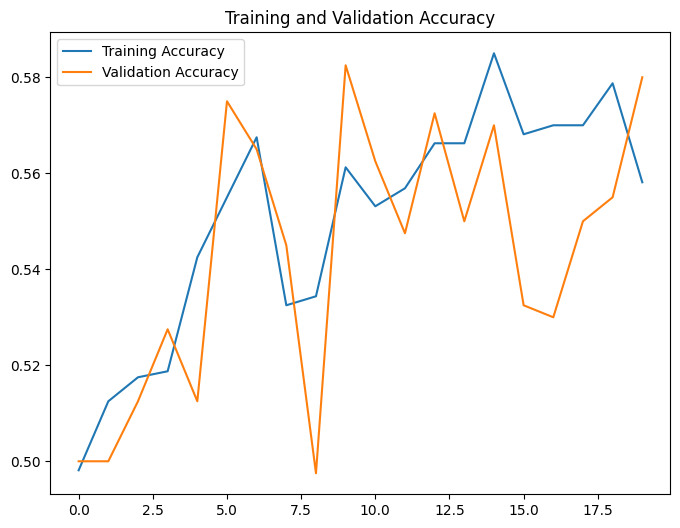

In [33]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(8, 6))
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()
